In [10]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns

pd.options.plotting.backend = "plotly"

# Check if wbdata is installed before installing
try:
    import wbdata
except ImportError:
    import sys
    !{sys.executable} -m pip install wbdata
    import wbdata

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

In [11]:
# Set World Bank Data Sources/Indicators for Agriculutre
ag_indicators = wbdata.get_indicators(topic=1)
ag_indicators

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO        Agricultural machinery, tractors
AG.CON.FERT.PT.ZS     Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS        Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.HA        Arable land (hectares)
AG.LND.ARBL.HA.PC     Arable land (hectares per person)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.CREL.HA        Land under cereal production (hectares)
AG.LND.CROP.ZS        Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)

## Agricultural Analysis for SouthEast Asian 

In [12]:
variable_labels = {"AG.PRD.CREL.MT":"Cereal Production (MT)",
                   "AG.PRD.CROP.XD":"Crop Production Index",
                  "AG.PRD.FOOD.XD":"Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population',
                   "SP.POP.TOTL":"Total Population"
                  # "EA.PRD.AGRI.KD":"Agricultural Value Added per Worker"
                  }

countries = {"KHM": "Cambodia",
             "LAO": "Lao PDR",
             "MMR": "Myanmar",
             "THA": "Thailand",
             "VNM": "Viet Nam"
            }

SEA_ag = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True)
SEA_ag = SEA_ag.reset_index()
SEA_ag = SEA_ag.rename(columns={'date': 'Date', 'country':'Country'})
SEA_ag = SEA_ag.set_index(['Date']).sort_index()
SEA_ag = SEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index", 
                            "Total Rural Population", 'Total Population'])
SEA_ag

,Country,Cereal Production (MT),Crop Production Index,Food Production Index,Total Rural Population,Total Population
Date,,,,,,
1961-01-01,Lao PDR,557000.00,7.03,7.41,1995778.0,2169796.0
1961-01-01,Myanmar,6936974.00,18.00,14.18,17864859.0,22210581.0
1961-01-01,Cambodia,2557300.00,20.49,19.66,4997728.0,5571168.0
1961-01-01,Thailand,10768676.00,18.04,21.05,22180821.0,27650334.0
1961-01-01,Viet Nam,9289600.00,14.54,14.05,28387343.0,33409059.0
...,...,...,...,...,...,...
2022-01-01,Viet Nam,47096981.27,109.55,113.65,61038452.0,99680655.0
2022-01-01,Cambodia,12787000.00,130.37,123.74,12881683.0,17201724.0
2022-01-01,Thailand,39729767.10,106.60,104.20,33795231.0,71735329.0


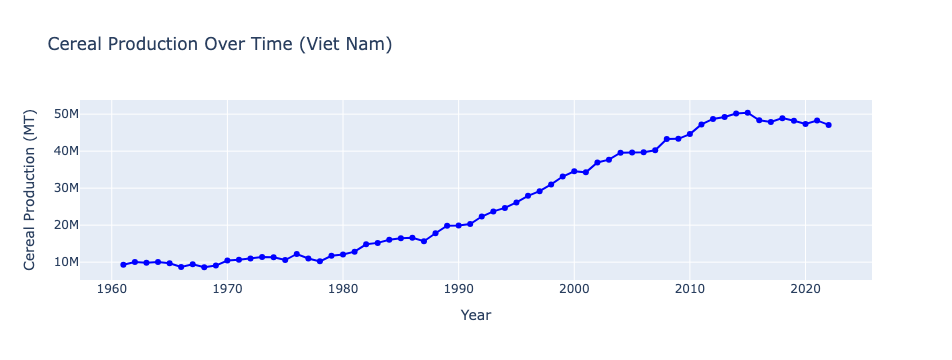

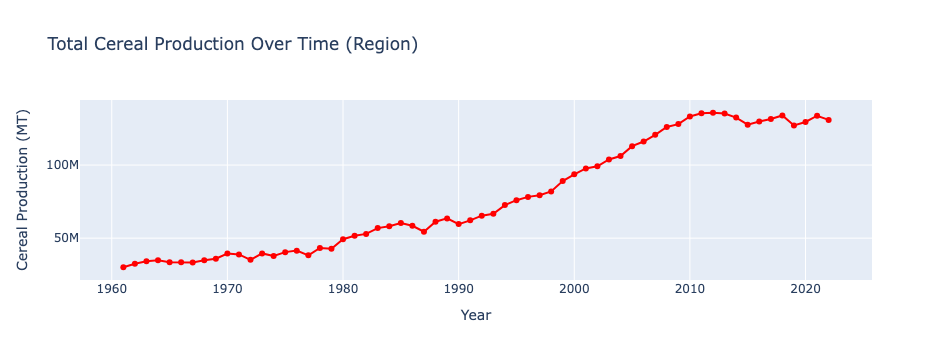

In [13]:
import plotly.graph_objects as go

def overlay_cereal_production(country_name, df):
    """
    Function to overlay cereal production over time for a given country.
    
    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with the cereal production data for the country.
    """
    df = df.reset_index()
    # Check if the country exists in the DataFrame
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Filter data for the given country
    country_df = df[df['Country'] == country_name]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the cereal production plot for the country
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cereal Production (MT)'], 
                             mode='lines+markers', name=country_name, 
                             line=dict(dash='solid', color='blue')))
    
    # Add title and labels
    fig.update_layout(title=f"Cereal Production Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

def overlay_cereal_production_region(df):
    """
    Function to overlay total cereal production over time for the whole region.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with total cereal production for the region.
    """
    df = df.reset_index()
    # Group data by year and sum the production
    region_df = df.groupby('Date')['Cereal Production (MT)'].sum().reset_index()
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total cereal production plot for the region
    fig.add_trace(go.Scatter(x=region_df['Date'], y=region_df['Cereal Production (MT)'], 
                             mode='lines+markers', name="Total Region", 
                             line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Cereal Production Over Time (Region)",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

# Example usage:
overlay_cereal_production("Viet Nam", SEA_ag)
overlay_cereal_production_region(SEA_ag)

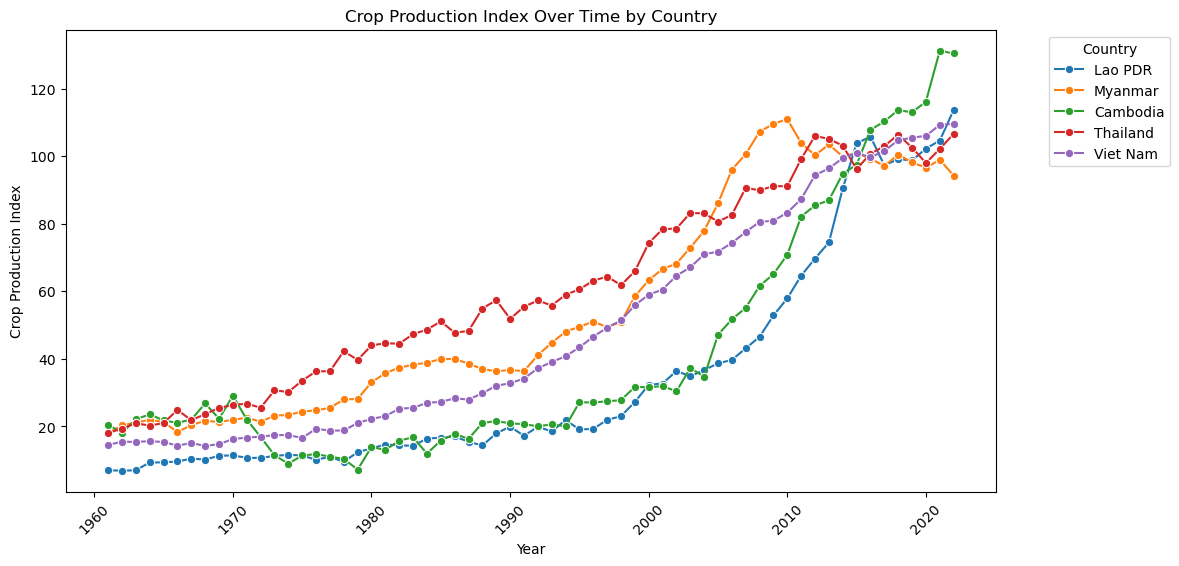

In [14]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

SEA_ag = SEA_ag.reset_index() 
SEA_ag = SEA_ag.rename(columns={'date': 'Date'})  # Ensure correct column name

plt.figure(figsize=(12, 6))

# Line plot for Crop Production Index over time
sns.lineplot(data=SEA_ag, x="Date", y="Crop Production Index", hue="Country", marker="o")

plt.xlabel("Year")
plt.ylabel("Crop Production Index")
plt.title("Crop Production Index Over Time by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

# green_rev_crops = ["Wheat", "Rice", "Maize", "Sorghum", "Barley"]

# plt.figure(figsize=(12, 6))

# # Filter dataset for only Green Revolution crops
# for crop in green_rev_crops:
#     if crop in SA_ag.columns:
#         sns.lineplot(data=SA_ag, x="Date", y=crop, label=crop)

# plt.xlabel("Year")
# plt.ylabel("Production Index")
# plt.title("Top Green Revolution Crops Over Time")
# plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.xticks(rotation=45)
# plt.show()